In [1]:
# Some useful websites:

## Xgboost paper by Tianqi Chen: https://arxiv.org/pdf/1603.02754.pdf
## Xgboost python api documentation: https://xgboost.readthedocs.io/en/latest/python/python_api.html#module-xgboost.sklearn
## Parameter explaination: https://github.com/dmlc/xgboost/blob/master/doc/parameter.rst
## Kaggle example: https://www.kaggle.com/stuarthallows/using-xgboost-with-scikit-learn
## An easy implementation for Xgboost example: https://github.com/RRdmlearning/Machine-Learning-From-Scratch/tree/master/xgboost 

In [2]:
import numpy as np

from scipy.stats import uniform, randint

from sklearn.datasets import load_breast_cancer, load_diabetes, load_wine
from sklearn.metrics import auc, accuracy_score, confusion_matrix, mean_squared_error

import xgboost as xgb

In [3]:
# Regression example

In [4]:
diabetes = load_diabetes()
X = diabetes.data
y = diabetes.target
print(X.shape)
print(y.shape)
print(X[0:5])
print(y[0:5])

(442, 10)
(442,)
[[ 0.03807591  0.05068012  0.06169621  0.02187235 -0.0442235  -0.03482076
  -0.04340085 -0.00259226  0.01990842 -0.01764613]
 [-0.00188202 -0.04464164 -0.05147406 -0.02632783 -0.00844872 -0.01916334
   0.07441156 -0.03949338 -0.06832974 -0.09220405]
 [ 0.08529891  0.05068012  0.04445121 -0.00567061 -0.04559945 -0.03419447
  -0.03235593 -0.00259226  0.00286377 -0.02593034]
 [-0.08906294 -0.04464164 -0.01159501 -0.03665645  0.01219057  0.02499059
  -0.03603757  0.03430886  0.02269202 -0.00936191]
 [ 0.00538306 -0.04464164 -0.03638469  0.02187235  0.00393485  0.01559614
   0.00814208 -0.00259226 -0.03199144 -0.04664087]]
[151.  75. 141. 206. 135.]


In [5]:
xgb_model = xgb.XGBRegressor(objective="reg:linear", random_state=42)
xgb_model.fit(X, y)
y_pred = xgb_model.predict(X)
mse = mean_squared_error(y, y_pred)
print(np.sqrt(mse))

[11:58:18] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
36.271203581682585


In [6]:
# Binary Classification example

In [7]:
cancer = load_breast_cancer()

X = cancer.data
y = cancer.target
print(X.shape)
print(y.shape)
print(X[0:5])
print(y[0:5])

(569, 30)
(569,)
[[1.799e+01 1.038e+01 1.228e+02 1.001e+03 1.184e-01 2.776e-01 3.001e-01
  1.471e-01 2.419e-01 7.871e-02 1.095e+00 9.053e-01 8.589e+00 1.534e+02
  6.399e-03 4.904e-02 5.373e-02 1.587e-02 3.003e-02 6.193e-03 2.538e+01
  1.733e+01 1.846e+02 2.019e+03 1.622e-01 6.656e-01 7.119e-01 2.654e-01
  4.601e-01 1.189e-01]
 [2.057e+01 1.777e+01 1.329e+02 1.326e+03 8.474e-02 7.864e-02 8.690e-02
  7.017e-02 1.812e-01 5.667e-02 5.435e-01 7.339e-01 3.398e+00 7.408e+01
  5.225e-03 1.308e-02 1.860e-02 1.340e-02 1.389e-02 3.532e-03 2.499e+01
  2.341e+01 1.588e+02 1.956e+03 1.238e-01 1.866e-01 2.416e-01 1.860e-01
  2.750e-01 8.902e-02]
 [1.969e+01 2.125e+01 1.300e+02 1.203e+03 1.096e-01 1.599e-01 1.974e-01
  1.279e-01 2.069e-01 5.999e-02 7.456e-01 7.869e-01 4.585e+00 9.403e+01
  6.150e-03 4.006e-02 3.832e-02 2.058e-02 2.250e-02 4.571e-03 2.357e+01
  2.553e+01 1.525e+02 1.709e+03 1.444e-01 4.245e-01 4.504e-01 2.430e-01
  3.613e-01 8.758e-02]
 [1.142e+01 2.038e+01 7.758e+01 3.861e+02 1.425e-0

In [8]:
xgb_model = xgb.XGBClassifier(objective="binary:logistic", random_state=42)
xgb_model.fit(X, y)

y_pred = xgb_model.predict(X)

print(confusion_matrix(y, y_pred))

[[212   0]
 [  0 357]]


In [9]:
# Multiclass classification

In [10]:
wine = load_wine()
X = wine.data
y = wine.target
print(X.shape)
print(y.shape)
print(X[0:5])
print(y[0:5])

(178, 13)
(178,)
[[1.423e+01 1.710e+00 2.430e+00 1.560e+01 1.270e+02 2.800e+00 3.060e+00
  2.800e-01 2.290e+00 5.640e+00 1.040e+00 3.920e+00 1.065e+03]
 [1.320e+01 1.780e+00 2.140e+00 1.120e+01 1.000e+02 2.650e+00 2.760e+00
  2.600e-01 1.280e+00 4.380e+00 1.050e+00 3.400e+00 1.050e+03]
 [1.316e+01 2.360e+00 2.670e+00 1.860e+01 1.010e+02 2.800e+00 3.240e+00
  3.000e-01 2.810e+00 5.680e+00 1.030e+00 3.170e+00 1.185e+03]
 [1.437e+01 1.950e+00 2.500e+00 1.680e+01 1.130e+02 3.850e+00 3.490e+00
  2.400e-01 2.180e+00 7.800e+00 8.600e-01 3.450e+00 1.480e+03]
 [1.324e+01 2.590e+00 2.870e+00 2.100e+01 1.180e+02 2.800e+00 2.690e+00
  3.900e-01 1.820e+00 4.320e+00 1.040e+00 2.930e+00 7.350e+02]]
[0 0 0 0 0]


In [11]:
xgb_model = xgb.XGBClassifier(objective="multi:softprob", random_state=42)
xgb_model.fit(X, y)

y_pred = xgb_model.predict(X)

print(confusion_matrix(y, y_pred))

[[59  0  0]
 [ 0 71  0]
 [ 0  0 48]]


In [12]:
# if we make our own data
X = np.random.uniform(low = 0.0, high = 1.0, size = (1000,2))
r = np.sum(np.square(X), axis = -1)
y = (r <= 1).astype(np.float)

In [13]:
import matplotlib.pyplot as plt

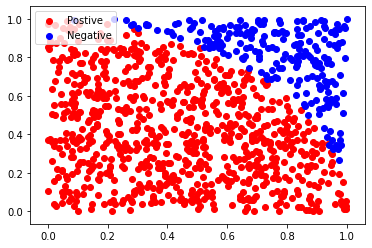

In [14]:
Xpos = X[y == 1.0]
Xneg = X[y == 0.0]
plt.figure()
plt.scatter(Xpos[:, 0], Xpos[:, 1], c = 'r', label = 'Postive')
plt.scatter(Xneg[:, 0], Xneg[:, 1], c = 'b', label = 'Negative')
plt.legend()
plt.show()

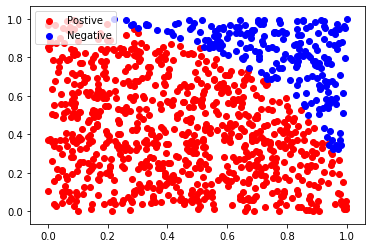

In [15]:
xgb_model = xgb.XGBClassifier(objective="binary:logistic", random_state=42)
xgb_model.fit(X, y)
y_pred = xgb_model.predict(X)
Xpos = X[y_pred == 1.0]
Xneg = X[y_pred == 0.0]
plt.figure()
plt.scatter(Xpos[:, 0], Xpos[:, 1], c = 'r', label = 'Postive')
plt.scatter(Xneg[:, 0], Xneg[:, 1], c = 'b', label = 'Negative')
plt.legend()
plt.show()